# Basic ELM stock forecasting

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import pinv
from sklearn.metrics import mean_squared_error


In [2]:
#pick stock and read data, datasets downloaded from yahoo finance
stock = 'AAPL' # E.g. TSLA, MSFT, AAPL...
df = pd.read_csv(stock +'.csv', index_col = 'Date',
                       parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-17,8.931429,9.093929,8.900000,8.998929,7.638261,422640400
2010-08-18,9.012857,9.095357,8.985000,9.038214,7.671606,339696000
2010-08-19,9.030000,9.052857,8.881429,8.924286,7.574904,426706000
2010-08-20,8.906786,9.068571,8.892857,8.915714,7.567627,384230000
2010-08-23,8.992500,9.000000,8.758929,8.778571,7.451218,414041600


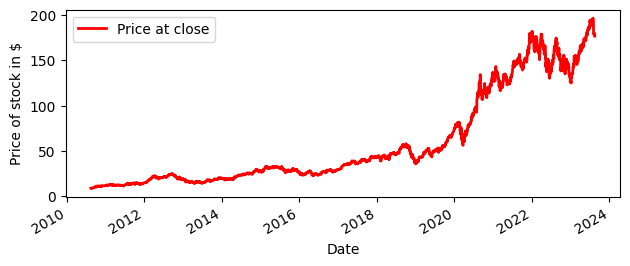

In [3]:
#Visualising data
fig = plt.figure()

#Plot price at close
ax1 = fig.add_subplot(211, xlabel ='Number of days', ylabel='Price of stock in $')
df['Close'].plot(ax=ax1, color='r', lw=2, label = 'Price at close')
ax1.legend()

# Plot returns
#ax2 = fig.add_subplot(212, ylabel='Returns $')
#ax2.plot(df.index[199:], out, lw=1.0)


plt.tight_layout()
plt.show()

In [4]:
#create 'sliding window' of data. Lag = how far in the future we want to predict


lag = 7

def sliding_window(time_series, lag):
    L = len(time_series)
    X = np.zeros((L-lag, lag))
    Y = np.zeros((L-lag,1))

    i = 0
    while lag + i < L:
        X[i,:] = time_series[i:lag+i]
        Y[i] = time_series[lag+i]
        i+=1
        
    return X, Y



    

In [5]:
#Splitting data

train_size = int(len(df) * 0.8)


time_series_train = df.Close[:train_size].values
time_train = df.Close[:train_size].index

time_series_test = df.Close[train_size:].values
time_test = df.Close[train_size:].index



# Normalising data
mean_train = np.mean(time_series_train)
sd_train = np.std(time_series_train)
time_series_train = (time_series_train-mean_train)/sd_train
time_series_test = (time_series_test-mean_train)/sd_train


x_train, y_train = sliding_window(time_series_train,lag)
x_test, y_test = sliding_window(time_series_test,lag)

In [6]:
# Generating weights and biases (normally distributed)
number_hidden_neurons = 50

input_weights = np.random.normal(0, 1, size=(lag, number_hidden_neurons))
print(np.shape(input_weights))

biases = np.random.normal(0, 1, size=(number_hidden_neurons))
print(np.shape(biases))

# Activation function
def activation(x):     
    return np.relu(x

(7, 50)
(50,)


In [7]:
# fitting
def fit(x):
    G = np.dot(x, input_weights) + biases
    H = activation(G)
    return H

# ELM formula tells us that y = B H implies B = H^-1 y
output_weights = np.dot(pinv(fit(x_train)), y_train)

# Prediction
def predict(x):
    out = np.dot(fit(x), output_weights)
    return out

prediction = predict(x_test)

#renormalise outputs
prediction = (prediction*sd_train) + mean_train

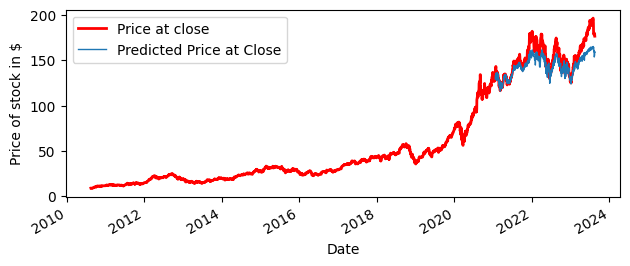

In [8]:
fig = plt.figure()


#Plot price at close
ax1 = fig.add_subplot(211, xlabel ='Number of days', ylabel='Price of stock in $')
df['Close'].plot(ax=ax1, color='r', lw=2, label = 'Price at close')

# Plot predictions
ax1.plot(time_test[lag:], prediction, lw=1.0, label = 'Predicted Price at Close')
ax1.legend()

plt.tight_layout()
plt.show()

In [9]:

y_test = (y_test*sd_train) + mean_train

# RMSE
rmse = math.sqrt(mean_squared_error(y_test, prediction))
print('Test RMSE: %.2f' % rmse)

Test RMSE: 11.87
